<a href="https://colab.research.google.com/github/binit24/Datascience.com/blob/main/World_Covid_Dataset_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing Libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
#import warnings:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
f = open("worldcovid.csv")

In [4]:
f = open("worldcovid2.csv")

In [5]:
#Reading the first Dataset:
df = pd.read_csv('worldcovid.csv')
print(df.shape) #checking no of rows and columns in the dataset.
df.head()

(6603, 9)


,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
0,2020-04-18,USA,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0
1,2020-04-18,Russia,145927292,1831892.0,36793.0,313.0,3057.0,8.0,33423.0
2,2020-04-18,Spain,46752703,930230.0,194416.0,20043.0,74797.0,7371.0,99576.0
3,2020-04-18,Brazil,212380932,62985.0,36722.0,2361.0,14026.0,6634.0,20335.0
4,2020-04-18,UK,67844241,460437.0,114217.0,15464.0,NaN,1559.0,98409.0


In [6]:
#Reading the Second Dataset:
df1 = pd.read_csv('worldcovid2.csv')
print(df.shape) #checking no of rows and columns in the dataset.
df1.head()

(6603, 9)


,Country,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years
0,USA,0.189,0.657,0.154
1,Russia,0.176,0.682,0.142
2,Spain,0.147,0.659,0.194
3,Brazil,0.217,0.697,0.086
4,UK,0.177,0.638,0.185


In [127]:
#Checking the info:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6603 entries, 0 to 6602
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Population           6603 non-null   float64
 1   Total Tests          6603 non-null   float64
 2   Total Cases          6603 non-null   float64
 3   Total Deaths         6603 non-null   float64
 4   Total Recovered      6603 non-null   float64
 5   Serious or Critical  6603 non-null   float64
 6   Active Cases         6603 non-null   float64
 7   Day                  6603 non-null   int64  
 8   month                6603 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 464.4 KB


In [8]:
#Checking for categorical columns:
cat_col = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        cat_col.append(x)
print("Categorical Columns:",cat_col)

Categorical Columns: ['Date', 'Country']


In [10]:
#Checking the value count and unique value of each categorical feature:
for col in df.columns:
    if df[col].dtypes == object:
        print(str(col)+':'+str(df[col].unique()))
        print(df[col].value_counts())
        print('********************************************')

Date:['2020-04-18' '2020-04-19' '2020-04-20' '2020-04-21' '2020-04-22'
 '2020-04-23' '2020-04-24' '2020-04-25' '2020-04-26' '2020-04-27'
 '2020-04-28' '2020-04-29' '2020-04-30' '2020-05-01' '2020-05-02'
 '2020-05-03' '2020-05-04' '2020-05-05' '2020-05-06' '2020-05-07'
 '2020-05-08' '2020-05-09' '2020-05-10' '2020-05-11' '2020-05-12'
 '2020-05-13' '2020-05-14' '2020-05-15' '2020-05-16' '2020-05-17'
 '2020-05-18']
2020-04-25    213
2020-04-19    213
2020-05-12    213
2020-05-09    213
2020-05-05    213
2020-05-15    213
2020-05-17    213
2020-05-04    213
2020-05-08    213
2020-04-23    213
2020-05-01    213
2020-05-18    213
2020-05-06    213
2020-05-14    213
2020-05-02    213
2020-04-18    213
2020-04-22    213
2020-05-07    213
2020-04-24    213
2020-04-21    213
2020-04-28    213
2020-04-30    213
2020-05-16    213
2020-05-03    213
2020-05-13    213
2020-04-20    213
2020-04-27    213
2020-04-29    213
2020-05-10    213
2020-04-26    213
2020-05-11    213
Name: Date, dtype: int64
*

                     Total Missing Value
Date                                   0
Country                                0
Population                             0
Total Tests                         1098
Total Cases                           49
Total Deaths                        1236
Total Recovered                      285
Serious or Critical                 2486
Active Cases                          59


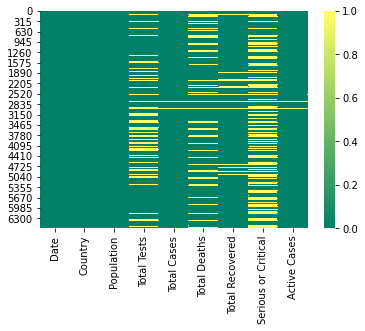

In [11]:
#Checking the null values in the dataset:
missing_value = pd.DataFrame(df.isnull().sum(),columns=['Total Missing Value'])
print(missing_value)
sns.heatmap(df.isnull(),cmap='summer')

In [12]:
#we will use simple imputer function from sklearn to remove null values:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy="mean")
for col in ['Active Cases','Total Cases','Total Tests','Total Deaths','Total Recovered','Serious or Critical']:
  df[col] = imp.fit_transform(df[col].values.reshape(-1,1))

Are There Missing Data? : False


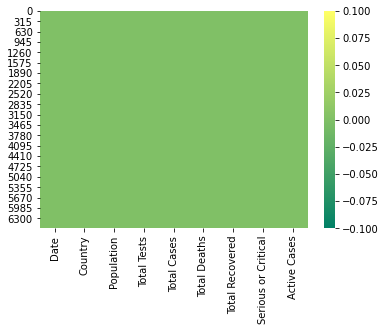

In [13]:
#Now again checking for missing values:
print("Are There Missing Data? :",df.isnull().any().any())
sns.heatmap(df.isnull(),cmap='summer')

In [14]:
#checking the Columns:
columns = list(df.columns)
print(df.shape)
print(columns)

(6603, 9)
['Date', 'Country', 'Population', 'Total Tests', 'Total Cases', 'Total Deaths', 'Total Recovered', 'Serious or Critical', 'Active Cases']


In [15]:
#Doing Statistical Analysis by using Describe Function
#Checking interquantile range.
#Checking mean median mode
df.describe()

,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
count,6.603000e+03,6.603000e+03,6.603000e+03,6603.000000,6603.000000,6603.000000,6.603000e+03
mean,3.637913e+07,2.167252e+05,1.692968e+04,1416.252096,5855.424185,386.748360,9.964142e+03
std,1.411537e+08,6.934856e+05,8.828521e+04,5990.992214,22955.519135,1309.473245,6.511732e+04
min,8.010000e+02,1.000000e+01,1.000000e+00,0.000000,1.000000,1.000000,0.000000e+00
25%,8.672680e+05,4.733000e+03,8.000000e+01,8.000000,29.000000,7.000000,2.700000e+01
50%,6.859926e+06,5.419500e+04,6.320000e+02,55.000000,253.000000,137.000000,2.840000e+02
75%,2.546422e+07,2.167252e+05,5.222500e+03,1416.252096,1786.500000,386.748360,2.230500e+03
max,1.439324e+09,1.230074e+07,1.550294e+06,91981.000000,356383.000000,18671.000000,1.101930e+06


In [ ]:
#Avg Total Recovered cases is 5855.424185
#Avg no of Deaths is around 1416.252096
#Avg Serious or Critical cases 386.748360
#There is possibility of presence of outliers as mean of some features are greater than median.
#In some of features theres an huge difference between 75% and max which confirm the presence of outliers.

In [ ]:
#Exploratory Data Analysis

#Univarite Analysis

#Multivariate Analysis

#Bivariate Analysis

#Here we check the relationship between different independant and dependant variable

In [16]:
#Univariate Analysis:
#Checking the total deaths cases:
df['Total Deaths'].sum()

9351512.590832867

   Country  Total Recovered
0      USA        6004896.0
1    Spain        4401203.0
2  Germany        3934213.0
3    Italy        2621286.0
4    China        2409176.0
5     Iran        2401164.0
6   Turkey        1915267.0
7   France        1565154.0
8   Brazil        1533045.0
9   Canada         773248.0


Text(0.5, 1.0, 'Top 10 countries with highest recoverd cases')

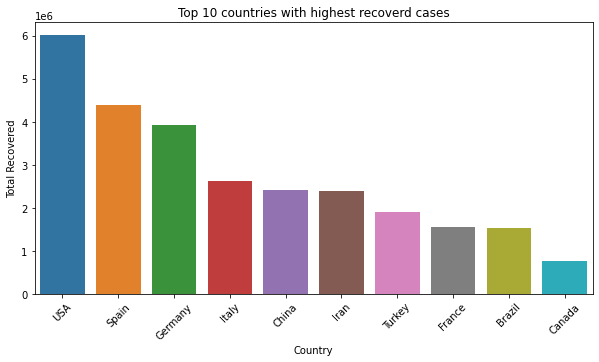

In [18]:
#Bivariate Analysis:
#Checking top 10 countries with highest recoverd cases:
top_10 = df.groupby(by ='Country')['Total Recovered'].sum().sort_values(ascending=False).head(10).reset_index()
print(top_10)
# Visualizing by bar plot:
plt.figure(figsize=(10,5))
plt.xticks(rotation=45)
sns.barplot(top_10['Country'],top_10['Total Recovered'])
plt.xlabel('Country')
plt.ylabel('Total Recovered')
plt.title('Top 10 countries with highest recoverd cases')

Text(0, 0.5, 'Deaths')

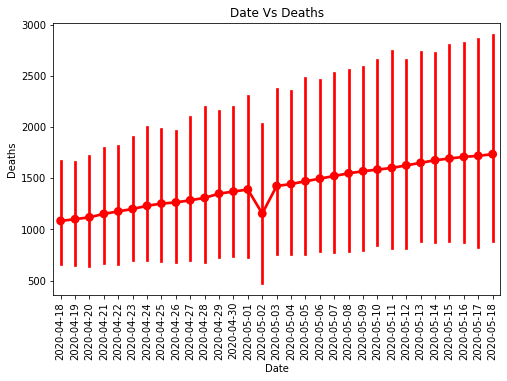

In [ ]:
# Bivariate Analysis Linear regression with marginal distributions
# Checking the relation Bewtween Confirmed cases and Deaths
plt.figure(figsize=(8,5))
sns.pointplot(x="Date", y="Total Deaths", data=df,color='red')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.title("Date Vs Deaths")
plt.ylabel('Deaths')
#With increase in confirmed cases Death Rate is also rising

   Country  Total Cases
0      USA   36196503.0
1    Spain    7547975.0
2    Italy    6416833.0
3       UK    5723955.0
4   France    5239029.0
5  Germany    5081214.0
6   Russia    4579604.0
7   Turkey    3813621.0
8   Brazil    3660023.0
9     Iran    3081226.0


Text(0.5, 1.0, 'Top 10 countries with highest cases')

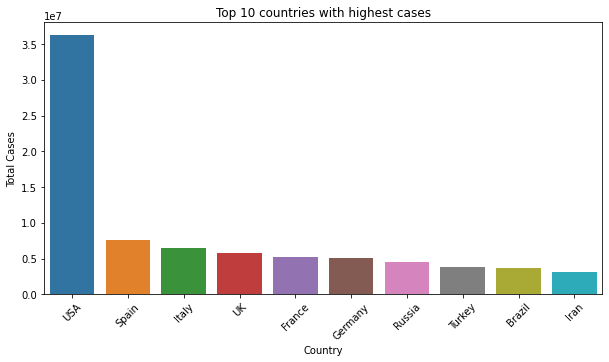

In [ ]:
#Bivariate Analysis:
#Checking top 10 countries with highest covid cases:
top_10 = df.groupby(by ='Country')['Total Cases'].sum().sort_values(ascending=False).head(10).reset_index()
print(top_10)
# Visualizing by bar plot:
plt.figure(figsize=(10,5))
plt.xticks(rotation=45)
sns.barplot(top_10['Country'],top_10['Total Cases'])
plt.xlabel('Country')
plt.ylabel('Total Cases')
plt.title('Top 10 countries with highest cases')

       Country  Total Deaths
0          USA     2102393.0
1        Italy      881699.0
2           UK      825478.0
3        Spain      767305.0
4       France      761760.0
5       Brazil      248971.0
6      Belgium      239111.0
7      Germany      208244.0
8         Iran      190809.0
9  Netherlands      151650.0


Text(0.5, 1.0, 'Top 10 countries with highest Total Deaths')

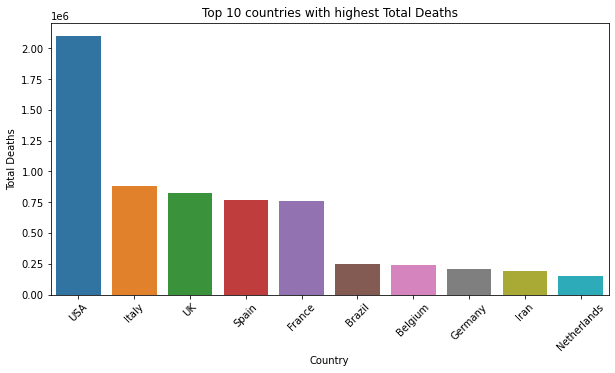

In [ ]:
#Bivariate Analysis:
#Checking top 10 countries with highest Total Deaths:
top_10 = df.groupby(by ='Country')['Total Deaths'].sum().sort_values(ascending=False).head(10).reset_index()
print(top_10)
# Visualizing by bar plot:
plt.figure(figsize=(10,5))
plt.xticks(rotation=45)
sns.barplot(top_10['Country'],top_10['Total Deaths'])
plt.xlabel('Country')
plt.ylabel('Total Deaths')
plt.title('Top 10 countries with highest Total Deaths')

   Country  Serious or Critical
0      USA             488102.0
1   Brazil             254091.0
2    Spain             126692.0
3   France             116069.0
4     Iran              89898.0
5  Germany              64827.0
6   Russia              61916.0
7    Italy              48807.0
8       UK              48329.0
9   Turkey              43941.0


Text(0.5, 1.0, 'Top 10 countries with highest Serious or Critical cases')

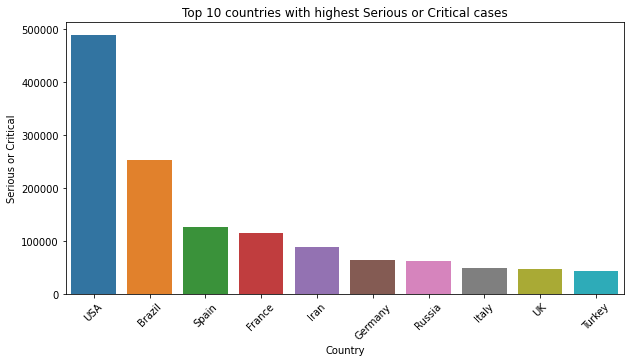

In [ ]:
#Bivariate Analysis:
#Checking top 10 countries with highest Serious or Critical cases:
top_10 = df.groupby(by ='Country')['Serious or Critical'].sum().sort_values(ascending=False).head(10).reset_index()
print(top_10)
# Visualizing by bar plot:
plt.figure(figsize=(10,5))
plt.xticks(rotation=45)
sns.barplot(top_10['Country'],top_10['Serious or Critical'])
plt.xlabel('Country')
plt.ylabel('Serious or Critical')
plt.title('Top 10 countries with highest Serious or Critical cases')

  Country  Active Cases
0     USA    28115408.0
1      UK     3864943.0
2  Russia     3802264.0
3   Italy     2915063.0
4  France     2912277.0
5   Spain     2380836.0
6  Brazil     1882320.0
7  Turkey     1798965.0
8   India     1004717.0
9    Peru      986286.0


Text(0.5, 1.0, 'Top 10 countries with highest Active Cases')

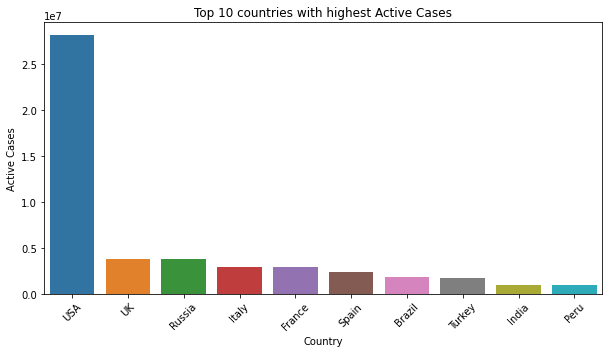

In [ ]:
#Bivariate Analysis:
#Checking top 10 countries with highest Active Cases:
top_10 = df.groupby(by ='Country')['Active Cases'].sum().sort_values(ascending=False).head(10).reset_index()
print(top_10)
# Visualizing by bar plot:
plt.figure(figsize=(10,5))
plt.xticks(rotation=45)
sns.barplot(top_10['Country'],top_10['Active Cases'])
plt.xlabel('Country')
plt.ylabel('Active Cases')
plt.title('Top 10 countries with highest Active Cases')

   Country  Total Tests
0      USA  232000501.0
1   Russia  130214963.0
2  Germany   77428491.0
3    Italy   66944808.0
4    Spain   55646156.0
5       UK   40873492.0
6      UAE   36006919.0
7    India   35718028.0
8   Turkey   35117203.0
9   France   29505482.0


Text(0.5, 1.0, 'Top 10 countries with highest Total Tests')

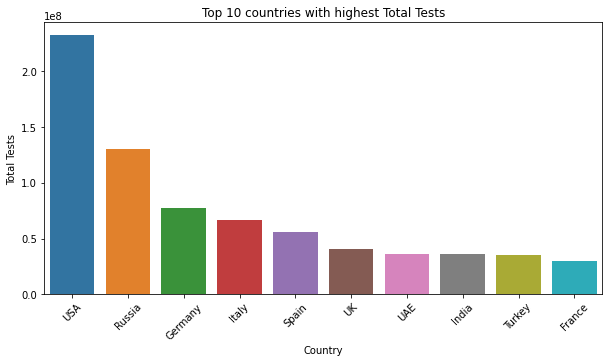

In [ ]:
#Bivariate Analysis:
#Checking top 10 countries with highest Total Tests:
top_10 = df.groupby(by ='Country')['Total Tests'].sum().sort_values(ascending=False).head(10).reset_index()
print(top_10)
# Visualizing by bar plot:
plt.figure(figsize=(10,5))
plt.xticks(rotation=45)
sns.barplot(top_10['Country'],top_10['Total Tests'])
plt.xlabel('Country')
plt.ylabel('Total Tests')
plt.title('Top 10 countries with highest Total Tests')

In [ ]:
#Checking city wise total confirmed and Recovered and Deaths Cases.
df.groupby('Country')['Total Cases','Total Recovered','Total Deaths'].sum().sort_values(ascending=False,by='Total Deaths').reset_index().head(10)

,Country,Total Cases,Total Recovered,Total Deaths
0,USA,36196503.0,6004896.0,2102393.0
1,Italy,6416833.0,2621286.0,881699.0
2,UK,5723955.0,0.0,825478.0
3,Spain,7547975.0,4401203.0,767305.0
4,France,5239029.0,1565154.0,761760.0
5,Brazil,3660023.0,1533045.0,248971.0
6,Belgium,1512544.0,371058.0,239111.0
7,Germany,5081214.0,3934213.0,208244.0
8,Iran,3081226.0,2401164.0,190809.0
9,Netherlands,1229504.0,0.0,151650.0


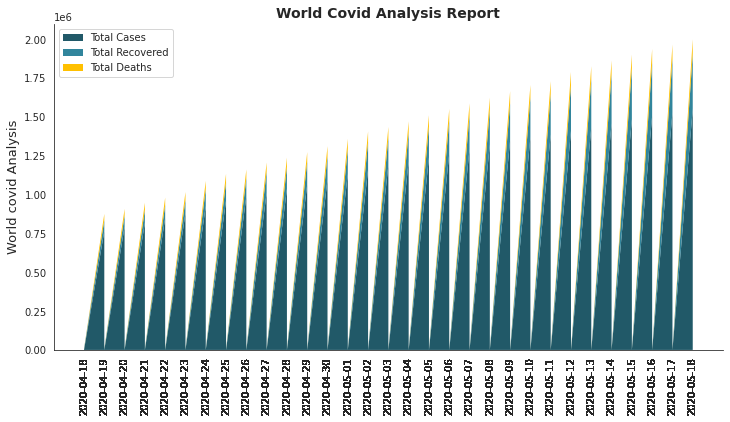

In [27]:
#Multivariate Analysis for India Covid Analysis:
#Checking World Covid Analyis by drawing Stack Plot:
colors = ["#215968", "#31859C", "#FFC000"]
labels = ["Total Cases", "Total Recovered", "Total Deaths"]
sns.set_style("white")
plt.figure(figsize = (12, 6))
plt.stackplot(df["Date"],df["Total Cases"],df["Total Recovered"],df["Total Deaths"],colors = colors,edgecolor = 'none')
plt.xticks(df["Date"], rotation = 90)
plt.legend(labels = labels, loc = "upper left")
plt.ylabel("World covid Analysis", fontsize = 13)
plt.title("World Covid Analysis Report", fontsize = 14, weight = "bold")
sns.despine()
plt.show()

In [23]:
#Checking no of confirmed Active and Deaths cases of India:
India = df.loc[df['Country'] == 'India']
India.groupby(by=['Date','Total Cases'])['Active Cases','Total Deaths'].sum().head(10).reset_index()

,Date,Total Cases,Active Cases,Total Deaths
0,2020-04-18,16365.0,13381.0,521.0
1,2020-04-19,17615.0,14202.0,559.0
2,2020-04-20,18539.0,14674.0,592.0
3,2020-04-21,20080.0,15460.0,645.0
4,2020-04-22,21370.0,16319.0,681.0
5,2020-04-23,23039.0,17306.0,721.0
6,2020-04-24,24447.0,18171.0,780.0
7,2020-04-25,26283.0,19519.0,825.0
8,2020-04-26,27890.0,20486.0,881.0
9,2020-04-27,29451.0,21375.0,939.0


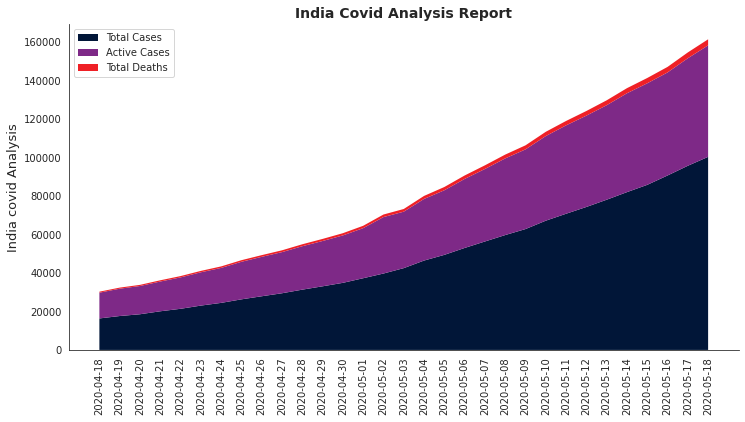

In [ ]:
#Multivariate Analysis for India Covid Analysis:
#Checking India Covid Analyis by drawing Stack Plot:
colors = ["#011638", "#7e2987", "ef2026"]
labels = ["Total Cases", "Active Cases", "Total Deaths"]
sns.set_style("white")
plt.figure(figsize = (12, 6))
plt.stackplot(India["Date"],India["Total Cases"],India["Active Cases"],India["Total Deaths"],colors = colors,edgecolor = 'none')
plt.xticks(India["Date"], rotation = 90)
plt.legend(labels = labels, loc = "upper left")
plt.ylabel("India covid Analysis", fontsize = 13)
plt.title("India Covid Analysis Report", fontsize = 14, weight = "bold")
sns.despine()
plt.show()

In [20]:
#Checking no of confirmed Active and Deaths cases of USA:
USA = df.loc[df['Country'] == 'India']
USA.groupby(by=['Date','Total Cases'])['Active Cases','Total Deaths'].sum().head(10).reset_index()

,Date,Total Cases,Active Cases,Total Deaths
0,2020-04-18,16365.0,13381.0,521.0
1,2020-04-19,17615.0,14202.0,559.0
2,2020-04-20,18539.0,14674.0,592.0
3,2020-04-21,20080.0,15460.0,645.0
4,2020-04-22,21370.0,16319.0,681.0
5,2020-04-23,23039.0,17306.0,721.0
6,2020-04-24,24447.0,18171.0,780.0
7,2020-04-25,26283.0,19519.0,825.0
8,2020-04-26,27890.0,20486.0,881.0
9,2020-04-27,29451.0,21375.0,939.0


<function matplotlib.pyplot.show>

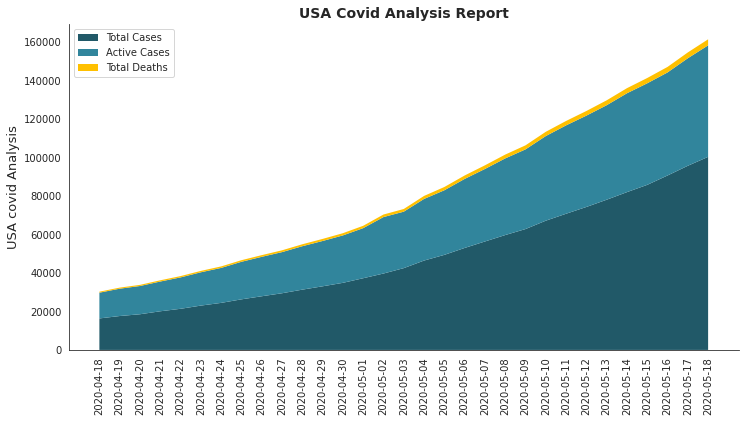

In [28]:
#Multivariate Analysis for usa Covid Analysis:
#Checking India Covid Analyis by drawing Stack Plot:
colors = ["#215968", "#31859C", "#FFC000"]
labels = ["Total Cases", "Active Cases", "Total Deaths"]
sns.set_style("white")
plt.figure(figsize = (12, 6))
plt.stackplot(USA["Date"],USA["Total Cases"],USA["Active Cases"],USA["Total Deaths"],colors = colors,edgecolor = 'none')
plt.xticks(USA["Date"], rotation = 90)
plt.legend(labels = labels, loc = "upper left")
plt.ylabel("USA covid Analysis", fontsize = 13)
plt.title("USA Covid Analysis Report", fontsize = 14, weight = "bold")
sns.despine()
plt.show

Population                AxesSubplot(0.125,0.657941;0.227941x0.222059)
Total Tests            AxesSubplot(0.398529,0.657941;0.227941x0.222059)
Total Cases            AxesSubplot(0.672059,0.657941;0.227941x0.222059)
Total Deaths              AxesSubplot(0.125,0.391471;0.227941x0.222059)
Total Recovered        AxesSubplot(0.398529,0.391471;0.227941x0.222059)
Serious or Critical    AxesSubplot(0.672059,0.391471;0.227941x0.222059)
Active Cases                 AxesSubplot(0.125,0.125;0.227941x0.222059)
dtype: object

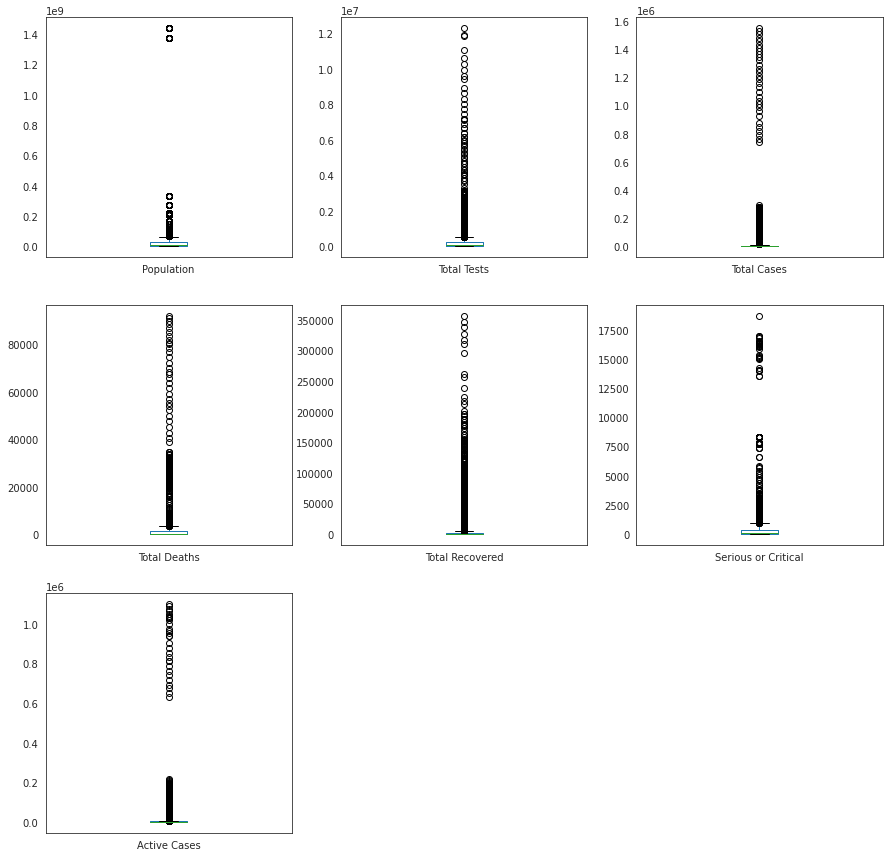

In [29]:
#Checking for outliers
#outlier is a data point that differs significantly from other observations. 
#Any datapoint greater than +3 Standard Deviations and -3 SD are called Outliers
#Zscore is Automated method used to handle outliers.
# Checking for Outliers by using boxplot:.
df.plot(kind='box',subplots=True,layout=(3,3),figsize=(15,15))

In [30]:
#We can clearly see the presence of Outliers in ample amount:

In [31]:
#From description we can see that Date is a object data type,Therefore, we have to convert this datatype into timestamp so as to use this column properly for prediction
df['Day'] = pd.to_datetime(df['Date'], format="%Y/%m/%d").dt.day

In [32]:
#Extracting Month
df['month'] = pd.to_datetime(df['Date'], format="%Y/%m/%d").dt.month

In [33]:
#Dropping Date Column:
df.drop('Date',axis=1,inplace=True)

In [42]:
#Dropping Country Column:
df.drop('Country',axis=1,inplace=True)

In [34]:
#Checking for skewness:
#whether the features are right or left skewed.
#for right and left skewed we can use logarthim transformation.
#if the skewness value is greater than o.55 then the features are skewed.
df.skew()

Population              8.743503
Total Tests             9.340104
Total Cases            12.079982
Total Deaths            8.951957
Total Recovered         7.220713
Serious or Critical     9.199670
Active Cases           13.301517
Day                    -0.027570
month                  -0.326934
dtype: float64

In [35]:
import scipy.stats as stat
import pylab

In [36]:
#If you want to check whether feature is guassian or normal distributed
# Q-Q plot is used to check wheather the data are normally distributed or not by graphically.
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

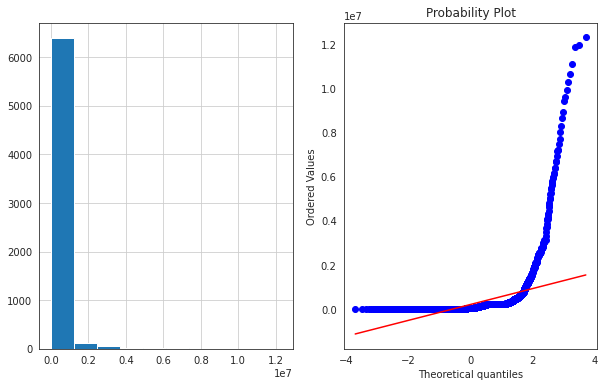

In [37]:
#We can check for skewness by using Distrution plot:
plot_data(df,'Total Tests')

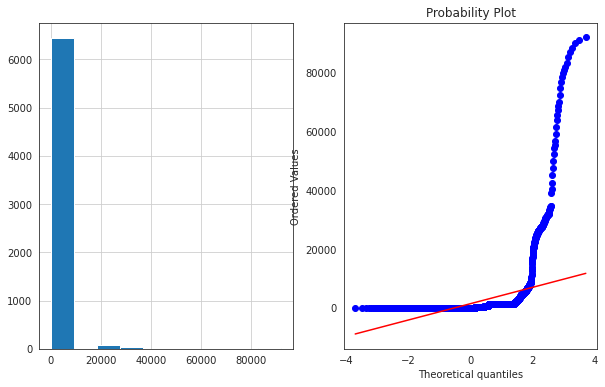

In [38]:
#We can check for skewness by using Distrution plot:
plot_data(df,'Total Deaths')

In [128]:
#We can see that some of the features are not normally distributed skewness is present 
#for skewed Data Logarthim Tranformation works fine or we can also use Boxcox Method.
#If the skewness value is greater than 0.55 we consider that the feature is skewed.
for col in df.columns:
        if df.skew().loc[col]>0.55:
            df[col] = np.log1p(df[col])

In [44]:
#Checking for outliers
#outlier is a data point that differs significantly from other observations. 
#Any datapoint greater than +3 Standard Deviations and -3 SD are called Outliers
#Zscore is Automated method used to handle outliers.
#Let check wheather any outliers are present or not
from scipy.stats import zscore
zscore = abs(zscore(df))
print("Before removal of outliers:",df.shape)
df_final = df.loc[(zscore<3).all(axis=1)]
print("After removal of outliers:",df_final.shape)

Before removal of outliers: (6603, 9)
After removal of outliers: (6571, 9)


In [45]:
#Let Separate the input and output variable:
#Let select input and output value:
X = df_final.drop(['Total Deaths'],axis=1)
y = df_final[['Total Deaths']]

In [46]:
#Lets check the shape of input and output values:
print(X.shape)
print(y.shape)

(6571, 8)
(6571, 1)


In [47]:
#Breaking the model into training and testing split:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [48]:
print(X_train.shape,'\t',X_test.shape)

(5256, 8) 	 (1315, 8)


In [49]:
print(y_train.shape,'\t',y_test.shape)

(5256, 1) 	 (1315, 1)


In [50]:
#Checking the coerelation:
#how the different neumerical features are corelated to each other 
#Their strength of relationship
#Their influence on target variable.
corrmat = X_train.corr()

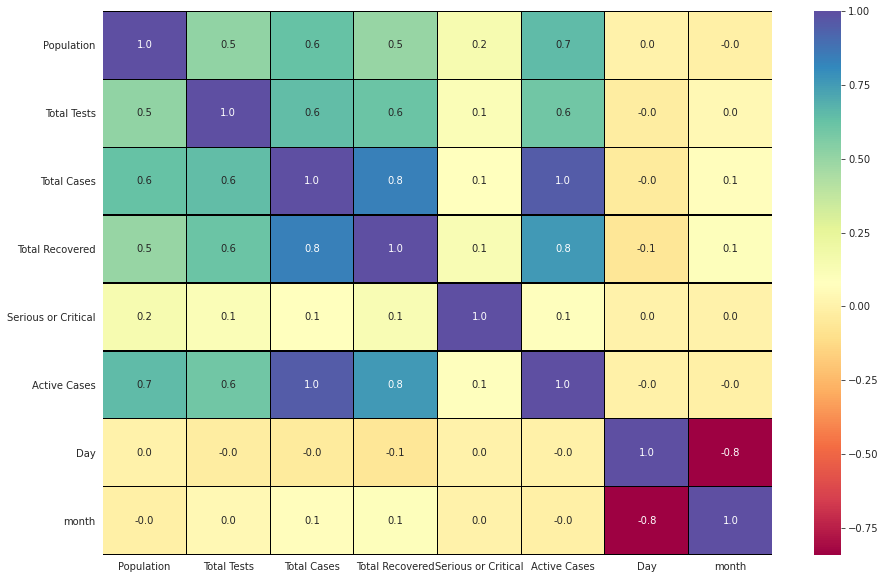

In [51]:
f,ax=plt.subplots(figsize=(15,10))
sns.heatmap(corrmat,annot=True,fmt=".1f",linewidths=.2,cmap="Spectral",ax=ax,linecolor="black")
plt.show()

In [52]:
#As we can see Date and Month are highly negative corelated lets drop it:
df_final.drop(columns=['Day','month'],axis=1,inplace=True)

Text(0.5, 1.0, 'corelation with target variable')

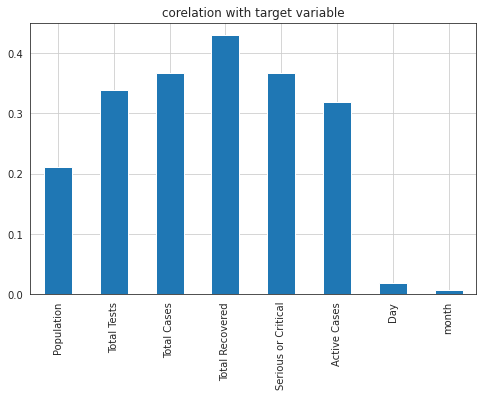

In [54]:
#corelation with target column:
plt.figure(figsize=(8,5))
df.drop('Total Deaths',axis=1).corrwith(df['Total Deaths']).plot(kind='bar',grid=True)
plt.xticks(rotation='vertical')
plt.title('corelation with target variable')

In [110]:
#Using StandardScaler to Preprocess the data:
#StandardScaler is used to bring the datapoints to standard normal distribution where mean = 0 and SD(+-)1:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [111]:
#Importing the Model for Predictions Process:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#Import Error Metrics:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score

In [112]:
#Defining a function of getting the perfect random state for max r2 score:
def maxr2_score(regr,X,y):
    max_r_score = 0
    for r_state in range(42,101):
        X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
        regr.fit(X_train,y_train)
        y_pred = regr.predict(X_test)
        r2_scr = r2_score(y_test,y_pred)
        print('r2_score corresponding to random state: ',r_state,"is ",r2_scr)
        if r2_scr>max_r_score:
            max_r_score = r2_scr
            final_r_state = r_state
    print("max_r_score corresponding to:",final_r_state,"is",max_r_score)
    return final_r_state

In [113]:
#Import Linear Regression:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
r_state = maxr2_score(lr,X,y)

r2_score corresponding to random state:  42 is  0.30341213391539634
r2_score corresponding to random state:  43 is  0.30341213391539634
r2_score corresponding to random state:  44 is  0.30341213391539634
r2_score corresponding to random state:  45 is  0.30341213391539634
r2_score corresponding to random state:  46 is  0.30341213391539634
r2_score corresponding to random state:  47 is  0.30341213391539634
r2_score corresponding to random state:  48 is  0.30341213391539634
r2_score corresponding to random state:  49 is  0.30341213391539634
r2_score corresponding to random state:  50 is  0.30341213391539634
r2_score corresponding to random state:  51 is  0.30341213391539634
r2_score corresponding to random state:  52 is  0.30341213391539634
r2_score corresponding to random state:  53 is  0.30341213391539634
r2_score corresponding to random state:  54 is  0.30341213391539634
r2_score corresponding to random state:  55 is  0.30341213391539634
r2_score corresponding to random state:  56 is  

In [114]:
#Lets do cross Validation.
from sklearn.model_selection import cross_val_score
print("mean r2_score for Linear Regression:",cross_val_score(lr,X,y,cv=5,scoring="r2").mean())
print("standard deviation in r2_score for linear Regression:",cross_val_score(lr,X,y,cv=5,scoring="r2").std())

mean r2_score for Linear Regression: 0.2935464090162411
standard deviation in r2_score for linear Regression: 0.021925574094867995


In [115]:
#Lets Ckeck with Lasso Regression by performing hyperparametre Tuning:
from sklearn.linear_model import Lasso
lasso = Lasso()

In [116]:
#Selecting the best alpha value:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
param = {'alpha':[0.001,0.01,0.1,1]}
grid = GridSearchCV(estimator=lasso,param_grid=param,cv=5,return_train_score=False)
grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [117]:
print(grid.best_params_)
print(grid.best_score_)

{'alpha': 0.001}
0.30021673759891493


In [118]:
#Using Best alpha value:
lasso = Lasso(alpha=0.001)
r_state = maxr2_score(lasso,X,y)

r2_score corresponding to random state:  42 is  0.30326545047600606
r2_score corresponding to random state:  43 is  0.30326545047600606
r2_score corresponding to random state:  44 is  0.30326545047600606
r2_score corresponding to random state:  45 is  0.30326545047600606
r2_score corresponding to random state:  46 is  0.30326545047600606
r2_score corresponding to random state:  47 is  0.30326545047600606
r2_score corresponding to random state:  48 is  0.30326545047600606
r2_score corresponding to random state:  49 is  0.30326545047600606
r2_score corresponding to random state:  50 is  0.30326545047600606
r2_score corresponding to random state:  51 is  0.30326545047600606
r2_score corresponding to random state:  52 is  0.30326545047600606
r2_score corresponding to random state:  53 is  0.30326545047600606
r2_score corresponding to random state:  54 is  0.30326545047600606
r2_score corresponding to random state:  55 is  0.30326545047600606
r2_score corresponding to random state:  56 is  

In [119]:
#Lets do cross Validation.
from sklearn.model_selection import cross_val_score
print("mean r2_score for Lasso Regression:",cross_val_score(lasso,X,y,cv=5,scoring="r2").mean())
print("standard deviation in r2_score for lasso Regression:",cross_val_score(lasso,X,y,cv=5,scoring="r2").std())

mean r2_score for Lasso Regression: 0.2936957551741905
standard deviation in r2_score for lasso Regression: 0.02220710779581893


In [120]:
#Lets Ckeck with Ridge Regression by performing hyperparametre Tuning:
from sklearn.linear_model import Ridge
ridge = Ridge()

In [121]:
#Selecting the best alpha value:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
param = {'alpha':[0.001,0.01,0.1,1]}
grid = GridSearchCV(estimator=ridge,param_grid=param,cv=5,return_train_score=False)
grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [122]:
print(grid.best_params_)
print(grid.best_score_)

{'alpha': 1}
0.30020035096105874


In [124]:
#Using Best alpha value:
ridge = Ridge(alpha=1)
r_state = maxr2_score(ridge,X,y)

r2_score corresponding to random state:  42 is  0.3034126411818483
r2_score corresponding to random state:  43 is  0.3034126411818483
r2_score corresponding to random state:  44 is  0.3034126411818483
r2_score corresponding to random state:  45 is  0.3034126411818483
r2_score corresponding to random state:  46 is  0.3034126411818483
r2_score corresponding to random state:  47 is  0.3034126411818483
r2_score corresponding to random state:  48 is  0.3034126411818483
r2_score corresponding to random state:  49 is  0.3034126411818483
r2_score corresponding to random state:  50 is  0.3034126411818483
r2_score corresponding to random state:  51 is  0.3034126411818483
r2_score corresponding to random state:  52 is  0.3034126411818483
r2_score corresponding to random state:  53 is  0.3034126411818483
r2_score corresponding to random state:  54 is  0.3034126411818483
r2_score corresponding to random state:  55 is  0.3034126411818483
r2_score corresponding to random state:  56 is  0.303412641181

In [125]:
#Lets do cross Validation.
from sklearn.model_selection import cross_val_score
print("mean r2_score for Ridge Regression:",cross_val_score(ridge,X,y,cv=5,scoring="r2").mean())
print("standard deviation in r2_score for Ridge Regression:",cross_val_score(ridge,X,y,cv=5,scoring="r2").std())

mean r2_score for Ridge Regression: 0.29355239333177396
standard deviation in r2_score for Ridge Regression: 0.021930194059107327


In [ ]:
#Any of the Model is not Providing us good Score lets go for Ensemble Technique. 
#Lets Try with Random Forest:

In [83]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [84]:
#Doing Prediction:
y_pred = reg_rf.predict(X_test)

In [85]:
#Checking Test Score:
reg_rf.score(X_test, y_test)

0.9388075125047622

In [88]:
from sklearn import metrics

In [89]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.21184048785573262
MSE: 0.4187648069170556
RMSE: 0.6471203959983456


In [ ]:
#Lets perform Hyperparametre Tuning and check the Results:

In [90]:
from sklearn.model_selection import RandomizedSearchCV

In [91]:
#Hyperparametre Tuning by using RandomizedSearch CV

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [92]:
#Create the random grid and input the values:
random_grid = {'n_estimators': n_estimators,'max_features': max_features,'max_depth': max_depth,'min_samples_split': min_samples_split,'min_samples_leaf': min_samples_leaf}

In [93]:
# Random search of parameters, using 5 fold cross validation, 
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error',n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [94]:
#Lets Fit Our Model:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.9s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.9s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.8s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.7s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.7s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.8s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   5.4s
[CV] n_estimators=1100, min_samples_split=10, mi

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  4.1min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [107]:
#Fetching Best Parametre
print(rf_random.best_params_)

{'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 25}


In [102]:
#Importing Alogorithim and initializing values:
reg_rf = RandomForestRegressor(max_depth=25,max_features='sqrt',min_samples_leaf=1,min_samples_split=2,n_estimators=1000)
reg_rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=25, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [103]:
prediction = reg_rf.predict(X_test)

In [104]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 0.2856483404306744
MSE: 0.5117295056037667
RMSE: 0.7153527141234363


In [105]:
metrics.r2_score(y_test, prediction)

0.9252229393316592

In [108]:
#Lets do cross Validation.
from sklearn.model_selection import cross_val_score
print("mean r2_score for Random Forest Regression:",cross_val_score(reg_rf,X,y,cv=5,scoring="r2").mean())
print("standard deviation in r2_score for Random Forest Regression:",cross_val_score(reg_rf,X,y,cv=5,scoring="r2").std())

mean r2_score for Random Forest Regression: 0.8352268446370189
standard deviation in r2_score for Random Forest Regression: 0.08412701862770906


In [109]:
#Saving the best Model for future predictions:
import joblib
joblib.dump(lr,'reg_rf.obj')
reg_rf_from_joblib = joblib.load('reg_rf.obj')
reg_rf_from_joblib.predict(X_test)

array([[3.75444625],
       [5.24610615],
       [3.89033559],
       ...,
       [5.37403002],
       [6.44856116],
       [3.02583191]])